In [1]:
# Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the website to scrape

page = requests.get("https://bandi.miur.it/bandi.php/public/cercaFellowship?jf_comp_status_id=2-3&bb_type_code=%25&idarea=%25&azione=cerca")

In [3]:
#Html parser using BS

soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
# Extract title of research projects using a list comprehension

titles = [i.get_text() for i in soup.find_all('a', text=True)[4:-2]]

In [5]:
# print the list of projects 

print(*titles,sep='\n')


Sviluppo di supporti decisionali per il miglioramento delle potenzialita' produttive delle api pubblicato su Albo Ufficiale con n.14935
Innovazione tecnologica attraverso hub, server e sensori remoti, sistemi di comunicazione per migliorare la sostenibilità delle filiere agroalimentari locali e delle biomasse agro-forestali pubblicato su Albo Ufficiale con n.14933
Formalizzazione e verifica, a scopi di cybersicurezza, di workflow di sistemi complessi
Il carteggio di Lorenzo e Filippo Strozzi nel fondo Carte Strozziane dell'Archivio di Stato di Firenze
Sustainable food consumption, production and agro-food system governance
L’ageismo nel mondo del lavoro: misure di prevenzione e di contrasto alle discriminazioni dei lavoratori anziani.
TeSmES - Tecnologie smart per edifici sostenibili
Costruzione setup per misure magnetoelettriche 
Attività di ricerca teorico computazionale per lo studio di proprietà strutturali e dinamiche di sistemi molecolari su superfici solide 
Materiali polimerici

In [6]:
df1 = pd.DataFrame(titles)

In [7]:
df1

,0
0,Sviluppo di supporti decisionali per il miglio...
1,"Innovazione tecnologica attraverso hub, server..."
2,"Formalizzazione e verifica, a scopi di cybersi..."
3,Il carteggio di Lorenzo e Filippo Strozzi nel ...
4,"Sustainable food consumption, production and a..."
...,...
709,Atena vs Lissa:il ruolo dell'alfabetizzazione ...
710,"Role of NOX-2 derived oxidative stress, endoth..."
711,“Digital Twin per la configurazione di scenari...
712,Applicazioni di metabolomica nello studio del ...


In [8]:
# Extract university names using a list comprehension

university = [i.get_text() for i in soup.find_all("strong")]

In [9]:
university

['Univ. FIRENZE',
 'Settore AGR/02 AGRONOMIA E COLTIVAZIONI ERBACEE',
 'Univ. FIRENZE',
 'Settore AGR/10 COSTRUZIONI RURALI E TERRITORIO AGROFORESTALE',
 'Univ. UDINE',
 'Settore INF/01 INFORMATICA',
 'Univ. UDINE',
 'Settore L-FIL-LET/13 FILOLOGIA DELLA LETTERATURA ITALIANA',
 'Univ. BOLOGNA',
 'Univ. UDINE',
 'Settore IUS/07 DIRITTO DEL LAVORO',
 'Univ. BOLZANO',
 'Settore ING-IND/11 FISICA TECNICA AMBIENTALE',
 'Univ. FIRENZE',
 'Settore CHIM/03 CHIMICA GENERALE ED INORGANICA',
 'Univ. FIRENZE',
 'Settore CHIM/02 CHIMICA FISICA',
 'Univ. FIRENZE',
 'Settore CHIM/04 CHIMICA INDUSTRIALE',
 'Univ. BOLOGNA',
 'Univ. FIRENZE',
 'Settore BIO/14 FARMACOLOGIA',
 'Univ. FIRENZE',
 'Settore AGR/02 AGRONOMIA E COLTIVAZIONI ERBACEE',
 'Univ. del SALENTO',
 'Settore FIS/04 FISICA NUCLEARE E SUBNUCLEARE',
 'ROMA "La Sapienza"',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofis

In [10]:
# Create a filter lambda function that removes department (e.g. Settore AGR/02) from the list

university = list(filter(lambda x: 'Settore' not in x, university))

In [11]:
university

['Univ. FIRENZE',
 'Univ. FIRENZE',
 'Univ. UDINE',
 'Univ. UDINE',
 'Univ. BOLOGNA',
 'Univ. UDINE',
 'Univ. BOLZANO',
 'Univ. FIRENZE',
 'Univ. FIRENZE',
 'Univ. FIRENZE',
 'Univ. BOLOGNA',
 'Univ. FIRENZE',
 'Univ. FIRENZE',
 'Univ. del SALENTO',
 'ROMA "La Sapienza"',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'Istituto Nazionale Geofisica e Vulcanologia',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'ROMA "La Sapienza"',
 'Univ. BOLZANO',
 'Univ. UDINE',
 'Univ. PAVIA',
 'Politecnico MILANO',
 'Univ. UDINE',
 'Univ. BOLOGNA',
 'Univ. BOLOGNA',
 'Istituto Nazionale di Oceanografia e di Geofisica Sperimentale',
 "Univ. L'AQUILA",
 "Univ. L'AQUILA",
 "Univ. L'AQUILA",
 'Univ. FIRENZE',
 'Univ. BOLOGNA',
 'Univ. BOLOGNA',
 'Univ. BOLOGNA',
 'Univ. BASILICATA',
 'Istituto Nazionale di Oceanogr

In [12]:
df2 = pd.DataFrame(university)

In [13]:
# Now i want scrape the deadline of the project call

In [14]:
# lets take a look at the html to find the relevant html tags

soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html lang="it" xml:lang="it" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="Bandi per Assegni di ricerca" name="title"/>\n  <meta content="bandi, assegni, ricerca, miur" name="keywords"/>\n  <meta content="it" name="language"/>\n  <title>\n   Bandi per Assegni di ricerca\n  </title>\n  <link href="/images/favicon.ico" rel="shortcut icon"/>\n  <link href="/css/bandi.css" media="screen" rel="stylesheet" type="text/css"/>\n  <link href="/css/schede.css" media="screen" rel="stylesheet" type="text/css"/>\n  <link href="/css/stampa.css" media="print" rel="stylesheet" type="text/css"/>\n  <script src="/js/jquery-1.5.2.min.js" type="text/javascript">\n  </script>\n  <script src="/js/menudinamico.js" type="text/javascript">\n  </script>\n  <script src="/js/jquery.pagination.js" type=

In [15]:
# Find all elements with the class 'example-class'
elements = soup.find_all(class_='aperto')

# Iterate through the elements and print their text
for element in elements:
    print(element.text)

 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 26/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/01/2023
 scade il giorno 27/

In [16]:
df3 = pd.DataFrame(elements)

In [17]:
# Check the length of the 3 df's (they should be the same len)

len(df1) == len(df2) == len(df3)

True

In [18]:
# Merge the two dataframes 

merged_df = pd.concat([df1, df2, df3], axis=1)

In [19]:
merged_df.columns = ['Project', 'University', 'Deadline']

merged_df

,Project,University,Deadline
0,Sviluppo di supporti decisionali per il miglio...,Univ. FIRENZE,scade il giorno 26/01/2023
1,"Innovazione tecnologica attraverso hub, server...",Univ. FIRENZE,scade il giorno 26/01/2023
2,"Formalizzazione e verifica, a scopi di cybersi...",Univ. UDINE,scade il giorno 26/01/2023
3,Il carteggio di Lorenzo e Filippo Strozzi nel ...,Univ. UDINE,scade il giorno 26/01/2023
4,"Sustainable food consumption, production and a...",Univ. BOLOGNA,scade il giorno 26/01/2023
...,...,...,...
709,Atena vs Lissa:il ruolo dell'alfabetizzazione ...,"ROMA ""La Sapienza""",scade il giorno 18/12/2023
710,"Role of NOX-2 derived oxidative stress, endoth...","ROMA ""La Sapienza""",scade il giorno 22/12/2023
711,“Digital Twin per la configurazione di scenari...,"ROMA ""La Sapienza""",scade il giorno 22/12/2023
712,Applicazioni di metabolomica nello studio del ...,Univ. FIRENZE,scade il giorno 23/12/2023


In [20]:
# Clean the deadline column to remove the 'scade il giorno' sub-string
merged_df['Deadline'] = merged_df['Deadline'].apply(lambda x: x.replace('scade il giorno', ''))

In [21]:
merged_df

,Project,University,Deadline
0,Sviluppo di supporti decisionali per il miglio...,Univ. FIRENZE,26/01/2023
1,"Innovazione tecnologica attraverso hub, server...",Univ. FIRENZE,26/01/2023
2,"Formalizzazione e verifica, a scopi di cybersi...",Univ. UDINE,26/01/2023
3,Il carteggio di Lorenzo e Filippo Strozzi nel ...,Univ. UDINE,26/01/2023
4,"Sustainable food consumption, production and a...",Univ. BOLOGNA,26/01/2023
...,...,...,...
709,Atena vs Lissa:il ruolo dell'alfabetizzazione ...,"ROMA ""La Sapienza""",18/12/2023
710,"Role of NOX-2 derived oxidative stress, endoth...","ROMA ""La Sapienza""",22/12/2023
711,“Digital Twin per la configurazione di scenari...,"ROMA ""La Sapienza""",22/12/2023
712,Applicazioni di metabolomica nello studio del ...,Univ. FIRENZE,23/12/2023


# 
# Create Research Job Search filter 




In [22]:
includeKeywords = ["social","media", "disinfo", "transna", "politiche"]

In [23]:
# Create new df of filtered list of research projects using a list comprehension

df4 = merged_df[merged_df.apply(lambda r: any([kw in r[0] for kw in includeKeywords]), axis=1)]

In [24]:
df4

,Project,University,Deadline
44,Metodologie innovative per lo studio delle po...,Univ. BASILICATA,27/01/2023
61,"Partiti, leadership ed élites politiche. Ostac...",Univ. PAVIA,27/01/2023
107,Promozione dell'acesso a servizi sociali e san...,Univ. MILANO-BICOCCA,30/01/2023
118,Studio e analisi della tradizione frammentaria...,Univ. NAPOLI,30/01/2023
137,"ESPE: un approccio orientato ai dati, basato s...",INSUBRIA,31/01/2023
141,Gestione dell’affinamento dei vini sur lies me...,Univ. UDINE,31/01/2023
156,Sviluppo di tecnologie per il rinforzo di stru...,Univ. BOLOGNA,31/01/2023
179,Agenti di cambiamento - Progetti per collabora...,Univ. BOLZANO,31/01/2023
196,Barriere e facilitatori delle politiche di ad...,Univ. BOLOGNA,31/01/2023
258,"Topic modeling, Sentiment analysis e Argument ...",Univ. UDINE,03/02/2023


In [25]:
# Export to excel

df4.to_excel("output.xlsx") 

In [26]:
# Create a barplot to see which universities have the most calls open

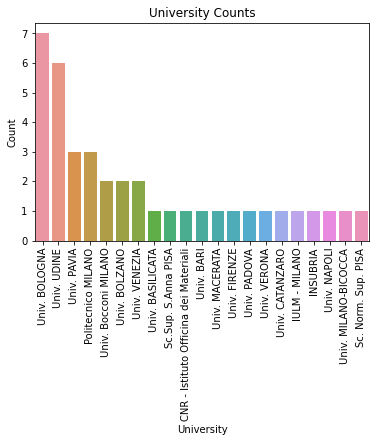

In [27]:
sns.countplot(x='University', data=df4, order=df4['University'].value_counts().index)

# Add a title and labels
plt.title('University Counts')
plt.xlabel('University')
plt.ylabel('Count')

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()